In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from google.colab import drive

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file1 = '/content/drive/My Drive/Colab Notebooks/Variant II.csv'
file2 = '/content/drive/My Drive/Colab Notebooks/Variant III.csv'
file3 = '/content/drive/My Drive/Colab Notebooks/Variant IV.csv'

df1 = pd.read_csv(file1, sep=",")
df2 = pd.read_csv(file2, sep=",")
df3 = pd.read_csv(file3, sep=",")


In [3]:
df = pd.concat([df1, df2], axis = 0)
df.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0.7,0.062288,-1,24,50,0.016740,-0.871747,AB,3430,...,0,INTERNET,6.804428,other,0,1,0,0,NaN,NaN
1,0,0.9,0.098433,-1,310,50,0.019002,-1.023805,AB,3492,...,0,INTERNET,1.412211,macintosh,0,1,0,0,NaN,NaN


In [4]:
df = pd.concat([df, df3], axis = 0)
df.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,x1,x2
0,0,0.7,0.062288,-1,24,50,0.016740,-0.871747,AB,3430,...,0,INTERNET,6.804428,other,0,1,0,0,NaN,NaN
1,0,0.9,0.098433,-1,310,50,0.019002,-1.023805,AB,3492,...,0,INTERNET,1.412211,macintosh,0,1,0,0,NaN,NaN


In [5]:
df.shape

(3000000, 34)

In [6]:
X = df[['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age'\
                                    , 'days_since_request'\
                                    , 'intended_balcon_amount',    'bank_branch_count_8w'\
                                    , 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid' ,'phone_mobile_valid'\
                                    ,'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes'\
                                    , 'keep_alive_session' ,'device_distinct_emails_8w', 'payment_type'\
        , 'employment_status', 'housing_status', 'device_os']].copy()
y = df['fraud_bool']


In [7]:
#Convertir variables categóricas a numéricas usando One-Hot Encoding
X = pd.get_dummies(X, columns = ['payment_type', 'employment_status', 'housing_status', 'device_os'], drop_first = True)


In [8]:
#Escalar las características numéricas
scaler = StandardScaler()
X[['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age'\
                                    , 'days_since_request'\
                                    , 'intended_balcon_amount',  'bank_branch_count_8w'\
                                    , 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid' ,'phone_mobile_valid'\
                                    ,'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes'\
                                    , 'keep_alive_session' ,'device_distinct_emails_8w']] \
                                    = scaler.fit_transform(X[['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age'\
                                    , 'days_since_request'\
                                    , 'intended_balcon_amount',  'bank_branch_count_8w'\
                                    , 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid' ,'phone_mobile_valid'\
                                    ,'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes'\
                                    , 'keep_alive_session' ,'device_distinct_emails_8w']])



In [9]:
#Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)



In [10]:
#Entrenar el modelo Gradient Boosting Classifier con ajustes de hiperparámetros
model = XGBClassifier(n_estimators=300, scale_pos_weight=99)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
#Evaluar el modelo en los datos de prueba
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo: {accuracy*100:.2f}%')


Accuracy del modelo: 89.19%


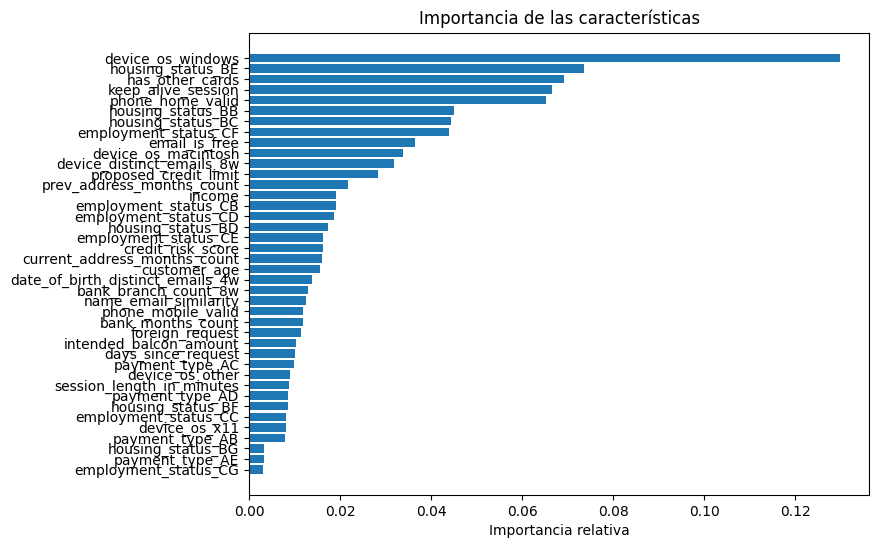

['modelo_bank.joblib']

In [12]:
#Importancia de características
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Importancia de las características')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Importancia relativa')
plt.show()

#Guardar el modelo con joblib
joblib.dump(model, 'modelo_bank.joblib')

In [13]:
print(X.columns)

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'payment_type_AB', 'payment_type_AC',
       'payment_type_AD', 'payment_type_AE', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'employment_status_CG', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
       'housing_status_BF', 'housing_status_BG', 'device_os_macintosh',
       'device_os_other', 'device_os_windows', 'device_os_x11'],
      dtype

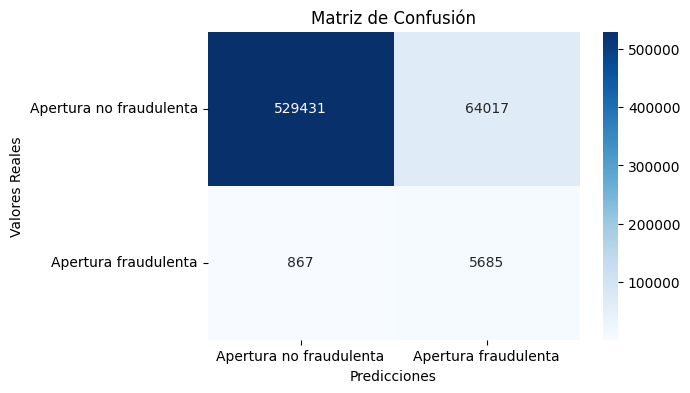

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Apertura no fraudulenta', 'Apertura fraudulenta']\
            , yticklabels=['Apertura no fraudulenta', 'Apertura fraudulenta'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [15]:
# Imprimir el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=['Apertura no fraudulenta', 'Apertura fraudulenta'])
print(report)

                         precision    recall  f1-score   support

Apertura no fraudulenta       1.00      0.89      0.94    593448
   Apertura fraudulenta       0.08      0.87      0.15      6552

               accuracy                           0.89    600000
              macro avg       0.54      0.88      0.55    600000
           weighted avg       0.99      0.89      0.93    600000

